# Predictive Modelling using Pycaret Regression

In [2]:
# Import Statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *

In [5]:
data = pd.read_csv("../Dataset/Cleaned_Rice_Data.csv")
data.head()

,Year,RiceCons,PerCapGNI,PerCapGDP,GNI_USD,GDP_USD,Inflation,MeanPriceUSD,TotPop,ResPop,...,CitSup20_64,CitDep20_64,CitChildDep20_64,CitOldDep20_64,ResNatInc,NatIncRate,IndPrecip,IndTemp,ThaPrecip,ThaTemp
0,2004,198,43841,46664,25937,27607,1.662727,250.78,4166664,3413266,...,7.6,57.3,44.1,13.2,20210,5.9,1030.22,25.04,1438.80,26.64
1,2005,233,47046,49867,28263,29957,0.425106,287.08,4265762,3467814,...,7.2,57.2,43.4,13.8,20243,5.8,1116.76,24.81,1581.45,26.85
2,2006,250,52201,53655,32854,33769,0.962902,310.95,4401365,3525894,...,6.9,57.2,42.8,14.4,20858,5.9,1190.39,25.11,1714.52,26.74
3,2007,274,57866,59429,38396,39433,2.104880,319.55,4588599,3583082,...,6.8,57.0,42.2,14.8,21029,5.9,1136.20,25.13,1662.52,26.64
4,2008,246,54524,56607,38538,40011,6.627782,577.13,4839396,3642659,...,6.7,56.2,41.2,15.0,21115,5.8,1157.89,24.87,1712.79,26.29


In [103]:
# setup data for modelling
s = setup(data, target='RiceCons', session_id=42, train_size = 0.7,
          feature_selection=True, feature_selection_method="classic", n_features_to_select=10)

,Description,Value
0,Session id,42
1,Target,RiceCons
2,Target type,Regression
3,Original data shape,"(19, 41)"
4,Transformed data shape,"(19, 11)"
5,Transformed train set shape,"(13, 11)"
6,Transformed test set shape,"(6, 11)"
7,Numeric features,40
8,Preprocess,True
9,Imputation type,simple


In [104]:
print(f'Ordinal features: {s._fxs["Ordinal"]}')
print(f'Numeric features: {s._fxs["Numeric"]}')
print(f'Date features: {s._fxs["Date"]}')
print(f'Text features: {s._fxs["Text"]}')
print(f'Categorical features: {s._fxs["Categorical"]}')

Ordinal features: {}
Numeric features: ['Year', 'PerCapGNI', 'PerCapGDP', 'GNI_USD', 'GDP_USD', 'Inflation', 'MeanPriceUSD', 'TotPop', 'ResPop', 'CitizenPop', 'PRPop', 'NonResPop', 'PopGrowth', 'ResPopGrowth', 'PopDensity', 'SexRatio', 'MedAgeRes', 'MedAgeCit', 'OldSupRatio', 'AgeDepRatio', 'ChildDepRat', 'OldDepRatio', 'OldSup20_64', 'AgeDep20_64', 'ChildDep20_64', 'OldDep20_64', 'CitSup15_64', 'CitDep15_64', 'CitChildDep15_64', 'CitOldDep15_64', 'CitSup20_64', 'CitDep20_64', 'CitChildDep20_64', 'CitOldDep20_64', 'ResNatInc', 'NatIncRate', 'IndPrecip', 'IndTemp', 'ThaPrecip', 'ThaTemp']
Date features: []
Text features: []
Categorical features: []


In [105]:
# compare baseline models
best = compare_models(sort="RMSE")

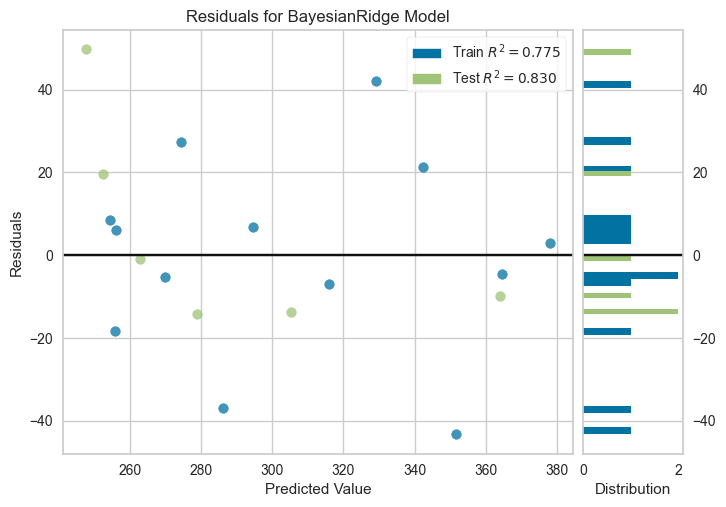

In [106]:
# plot residuals
plot_model(best, plot='residuals')

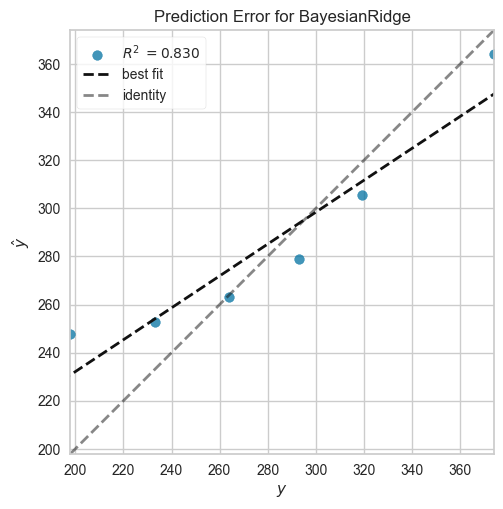

In [107]:
# plot error
plot_model(best, plot = 'error')

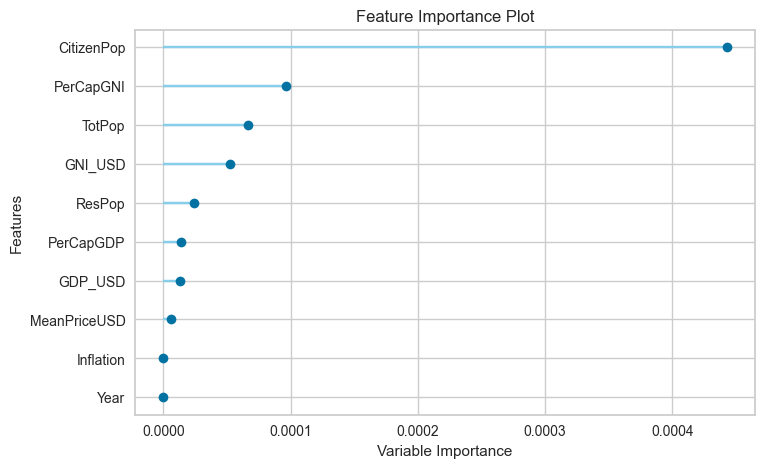

In [108]:
# plot feature importance
plot_model(best, plot = 'feature_all')

In [109]:
best

BayesianRidge()

In [110]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Tune Model

In [111]:
# tune hyperparameters of best model
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,40.5049,1754.2240,41.8835,-40.5201,0.1413,0.1436
1,77.2859,6006.1204,77.4992,-34.5392,0.2253,0.2020
2,52.1212,2773.1978,52.6612,-1.0816,0.1846,0.1815
3,27.0753,733.0708,27.0753,nan,0.0695,0.0722
4,28.5762,816.5970,28.5762,nan,0.1095,0.1162
5,26.8483,720.8306,26.8483,nan,0.0865,0.0831
6,48.4500,2347.4073,48.4500,nan,0.1784,0.1962
7,4.0161,16.1289,4.0161,nan,0.0138,0.0139
8,50.3628,2536.4079,50.3628,nan,0.1453,0.1569


Fitting 10 folds for each of 10 candidates, totalling 100 fits


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Prediction

In [112]:
holdout_pred = predict_model(best)
holdout_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,18.0251,557.6173,23.6139,0.8303,0.1011,0.0762


,Year,PerCapGNI,PerCapGDP,GNI_USD,GDP_USD,Inflation,MeanPriceUSD,TotPop,ResPop,CitizenPop,...,CitChildDep20_64,CitOldDep20_64,ResNatInc,NatIncRate,IndPrecip,IndTemp,ThaPrecip,ThaTemp,RiceCons,prediction_label
0,2004,43841,46664,25937,27607,1.662727,250.779999,4166664,3413266,3057087,...,44.099998,13.200000,20210,5.9,1030.219971,25.040001,1438.800049,26.639999,198,247.734530
5,2009,53683,56619,36908,38927,0.596720,614.330017,4987573,3733876,3200693,...,39.900002,15.400000,20912,5.6,1001.020020,25.590000,1638.829956,26.680000,264,262.984148
11,2015,71283,76503,51850,55647,-0.522618,495.750000,5535002,3902690,3375023,...,34.700001,20.299999,19221,4.9,1124.410034,25.010000,1420.209961,27.299999,319,305.349663
1,2005,47046,49867,28263,29957,0.425106,287.079987,4265762,3467814,3081001,...,43.400002,13.800000,20243,5.8,1116.760010,24.809999,1581.449951,26.850000,233,252.605071
8,2012,66330,69417,53077,55547,4.575603,390.850006,5312437,3818205,3285140,...,36.799999,17.000000,21368,5.6,1067.479980,24.879999,1538.849976,27.160000,293,278.809609


In [113]:
data2 = data.copy()
data2.drop('RiceCons', axis=1, inplace=True)
data2.head()

,Year,PerCapGNI,PerCapGDP,GNI_USD,GDP_USD,Inflation,MeanPriceUSD,TotPop,ResPop,CitizenPop,...,CitSup20_64,CitDep20_64,CitChildDep20_64,CitOldDep20_64,ResNatInc,NatIncRate,IndPrecip,IndTemp,ThaPrecip,ThaTemp
0,2004,43841,46664,25937,27607,1.662727,250.78,4166664,3413266,3057087,...,7.6,57.3,44.1,13.2,20210,5.9,1030.22,25.04,1438.80,26.64
1,2005,47046,49867,28263,29957,0.425106,287.08,4265762,3467814,3081001,...,7.2,57.2,43.4,13.8,20243,5.8,1116.76,24.81,1581.45,26.85
2,2006,52201,53655,32854,33769,0.962902,310.95,4401365,3525894,3107924,...,6.9,57.2,42.8,14.4,20858,5.9,1190.39,25.11,1714.52,26.74
3,2007,57866,59429,38396,39433,2.104880,319.55,4588599,3583082,3133848,...,6.8,57.0,42.2,14.8,21029,5.9,1136.20,25.13,1662.52,26.64
4,2008,54524,56607,38538,40011,6.627782,577.13,4839396,3642659,3164438,...,6.7,56.2,41.2,15.0,21115,5.8,1157.89,24.87,1712.79,26.29


In [114]:
data2.columns

Index(['Year', 'PerCapGNI', 'PerCapGDP', 'GNI_USD', 'GDP_USD', 'Inflation',
       'MeanPriceUSD', 'TotPop', 'ResPop', 'CitizenPop', 'PRPop', 'NonResPop',
       'PopGrowth', 'ResPopGrowth', 'PopDensity', 'SexRatio', 'MedAgeRes',
       'MedAgeCit', 'OldSupRatio', 'AgeDepRatio', 'ChildDepRat', 'OldDepRatio',
       'OldSup20_64', 'AgeDep20_64', 'ChildDep20_64', 'OldDep20_64',
       'CitSup15_64', 'CitDep15_64', 'CitChildDep15_64', 'CitOldDep15_64',
       'CitSup20_64', 'CitDep20_64', 'CitChildDep20_64', 'CitOldDep20_64',
       'ResNatInc', 'NatIncRate', 'IndPrecip', 'IndTemp', 'ThaPrecip',
       'ThaTemp'],
      dtype='object')

In [115]:
predictions = predict_model(best, data=data2)
predictions.head()

,Year,PerCapGNI,PerCapGDP,GNI_USD,GDP_USD,Inflation,MeanPriceUSD,TotPop,ResPop,CitizenPop,...,CitDep20_64,CitChildDep20_64,CitOldDep20_64,ResNatInc,NatIncRate,IndPrecip,IndTemp,ThaPrecip,ThaTemp,prediction_label
0,2004,43841,46664,25937,27607,1.662727,250.779999,4166664,3413266,3057087,...,57.299999,44.099998,13.2,20210,5.9,1030.219971,25.040001,1438.800049,26.639999,247.734530
1,2005,47046,49867,28263,29957,0.425106,287.079987,4265762,3467814,3081001,...,57.200001,43.400002,13.8,20243,5.8,1116.760010,24.809999,1581.449951,26.850000,252.605071
2,2006,52201,53655,32854,33769,0.962902,310.950012,4401365,3525894,3107924,...,57.200001,42.799999,14.4,20858,5.9,1190.390015,25.110001,1714.520020,26.740000,256.174312
3,2007,57866,59429,38396,39433,2.104880,319.549988,4588599,3583082,3133848,...,57.000000,42.200001,14.8,21029,5.9,1136.199951,25.129999,1662.520020,26.639999,255.750168
4,2008,54524,56607,38538,40011,6.627782,577.130005,4839396,3642659,3164438,...,56.200001,41.200001,15.0,21115,5.8,1157.890015,24.870001,1712.790039,26.290001,254.433761


In [116]:
# save model
save_model(best, 'RC_Predict')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'PerCapGNI', 'PerCapGDP',
                                              'GNI_USD', 'GDP_USD', 'Inflation',
                                              'MeanPriceUSD', 'TotPop', 'ResPop',
                                              'CitizenPop', 'PRPop', 'NonResPop',
                                              'PopGrowth', 'ResPopGrowth',
                                              'PopDensity', 'SexRatio',
                                              'MedAgeRes', 'MedAgeCit',
                                              'OldSupRatio', 'AgeDepRatio',
                                              'ChildDepRat', 'OldDepRat...
                                              'CitChildDep15_64',
                                              'CitOldDep15_64', ...],
                                     transformer=SimpleImputer())),
                 ('cat